In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

#mean
def get_mean(arr):
    return np.sum(arr)/len(arr)

#variance
def get_variance(arr,mean):
    return np.sum((arr-mean)**2)

#covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

# Coefficients 
# m = cov(x, y) / var(x)
# b = y - m*x
def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    b = y_mean - x_mean*m
    return m, b

def linear_regression(X_train,X_test,y_train,y_test):
    prediction=[]
    m,c=get_coefficients(X_train,y_train)
    for i in X_test:
        y=m*i+c
        prediction.append(y)
        
    r2 = r2_score(prediction, y_test)
    mse = mean_squared_error(prediction, y_test)
    print("Coefficient of the equation: ",m)
    print("Intercept: ",c)
    print("The R2 score of the model is: ", r2)
    print("The MSE score of the model is: ", mse)
    return prediction

df=pd.read_csv(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\student_scores.csv")
x=df['Hours'].values
y=df['Scores'].values
linear_regression(x[:18],x[18:],y[:18],y[18:])


Coefficient of the equation:  9.551474065899418
Intercept:  2.8046402858794366
The R2 score of the model is:  0.8862317755411291
The MSE score of the model is:  33.060769543723545


[61.068632087865886,
 73.48554837353512,
 28.593620263807868,
 48.65171580219664,
 39.10024173629722,
 68.70981134058542,
 77.3061379998949]

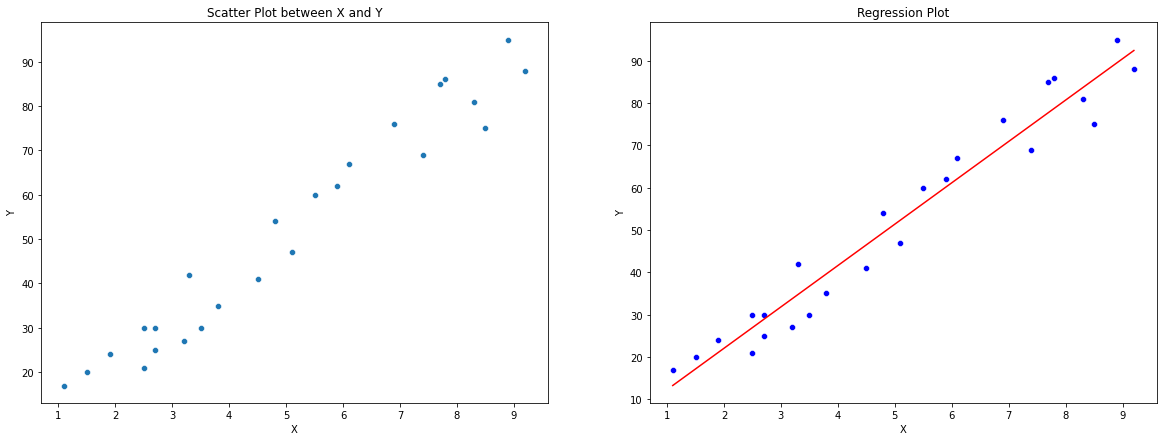

In [5]:
# Visualize
def plot_reg_line(x, y):
    prediction = []
    m, c = get_coefficients(x, y)
    for x0 in x[5:]:
        yhat = m*x0 + c
        prediction.append(yhat)
    
    fig = plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot between X and Y')
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=x, y=y, color = 'blue')
    sns.lineplot(x = [i for i in x[5:]], y = prediction, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Plot')
    plt.show()
    
plot_reg_line(x, y)